# Analysing the Most Effective Goalscorers, 2016-2020

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, precision_score, accuracy_score,confusion_matrix, plot_confusion_matrix, classification_report, f1_score
from sklearn.datasets import make_classification

In [3]:
df =pd.read_csv('data.csv')

In [4]:
df.head()

,Country,League,Club,Player Names,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year
0,Spain,La Liga,(BET),Juanmi Callejon,19,16,1849,11,6.62,0.34,48,20,2.47,1.03,2016
1,Spain,La Liga,(BAR),Antoine Griezmann,36,0,3129,16,11.86,0.36,88,41,2.67,1.24,2016
2,Spain,La Liga,(ATL),Luis Suarez,34,1,2940,28,23.21,0.75,120,57,3.88,1.84,2016
3,Spain,La Liga,(CAR),Ruben Castro,32,3,2842,13,14.06,0.47,117,42,3.91,1.40,2016
4,Spain,La Liga,(VAL),Kevin Gameiro,21,10,1745,13,10.65,0.58,50,23,2.72,1.25,2016


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  660 non-null    object 
 1   League                   660 non-null    object 
 2   Club                     660 non-null    object 
 3   Player Names             660 non-null    object 
 4   Matches_Played           660 non-null    int64  
 5   Substitution             660 non-null    int64  
 6   Mins                     660 non-null    int64  
 7   Goals                    660 non-null    int64  
 8   xG                       660 non-null    float64
 9   xG Per Avg Match         660 non-null    float64
 10  Shots                    660 non-null    int64  
 11  OnTarget                 660 non-null    int64  
 12  Shots Per Avg Match      660 non-null    float64
 13  On Target Per Avg Match  660 non-null    float64
 14  Year                     6

In [17]:
df.isnull().sum()

Country                    0
League                     0
Club                       0
Player Names               0
Matches_Played             0
Substitution               0
Mins                       0
Goals                      0
xG                         0
xG Per Avg Match           0
Shots                      0
OnTarget                   0
Shots Per Avg Match        0
On Target Per Avg Match    0
Year                       0
dtype: int64

## Comparing the Two Greatest Players of All Time

In [7]:
players = df[['Player Names','Goals','xG','Year']][(df['Player Names']=='Cristiano Ronaldo') | (df['Player Names']=='Lionel Messi')]

In [8]:
players

,Player Names,Goals,xG,Year
5,Cristiano Ronaldo,25,24.68,2016
12,Lionel Messi,37,26.65,2016
107,Lionel Messi,33,32.54,2017
112,Cristiano Ronaldo,26,29.00,2017
195,Lionel Messi,36,25.49,2018
203,Cristiano Ronaldo,21,21.65,2018
333,Lionel Messi,25,21.63,2019
385,Cristiano Ronaldo,31,27.32,2019
528,Lionel Messi,4,5.46,2020
553,Cristiano Ronaldo,8,5.31,2020


In [9]:
players["xG Differential"] = players["Goals"] - players["xG"]

In [10]:
players

,Player Names,Goals,xG,Year,xG Differential
5,Cristiano Ronaldo,25,24.68,2016,0.32
12,Lionel Messi,37,26.65,2016,10.35
107,Lionel Messi,33,32.54,2017,0.46
112,Cristiano Ronaldo,26,29.00,2017,-3.00
195,Lionel Messi,36,25.49,2018,10.51
203,Cristiano Ronaldo,21,21.65,2018,-0.65
333,Lionel Messi,25,21.63,2019,3.37
385,Cristiano Ronaldo,31,27.32,2019,3.68
528,Lionel Messi,4,5.46,2020,-1.46
553,Cristiano Ronaldo,8,5.31,2020,2.69


In [11]:
players.sort_values(by=["xG Differential"], ascending = False)

,Player Names,Goals,xG,Year,xG Differential
195,Lionel Messi,36,25.49,2018,10.51
12,Lionel Messi,37,26.65,2016,10.35
385,Cristiano Ronaldo,31,27.32,2019,3.68
333,Lionel Messi,25,21.63,2019,3.37
553,Cristiano Ronaldo,8,5.31,2020,2.69
107,Lionel Messi,33,32.54,2017,0.46
5,Cristiano Ronaldo,25,24.68,2016,0.32
203,Cristiano Ronaldo,21,21.65,2018,-0.65
528,Lionel Messi,4,5.46,2020,-1.46
112,Cristiano Ronaldo,26,29.00,2017,-3.00


Text(0.5, 0, 'xG Differential')

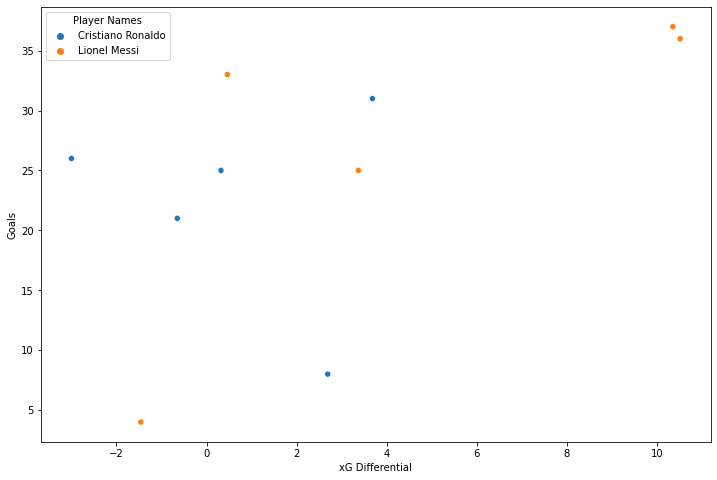

In [44]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x ='xG Differential', y='Goals', hue="Player Names", data = players)
ax.set_xlabel('xG Differential')

In [34]:
df["xG Differential"] = df["Goals"] - df["xG"]
df["Player Year"] = df ['Player Names'] + " " + df['Year'].astype(str)
df.sort_values(by=["xG Differential"], ascending = False)

,Country,League,Club,Player Names,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year,xG Differential,Player Year
317,USA,MLS,(LAF),Carlos Vela,33,0,3128,36,25.35,0.77,167,75,5.07,2.28,2019,10.65,Carlos Vela 2019
123,Italy,Serie A,(JUV),Paulo Dybala,26,7,2407,22,11.40,0.45,114,45,4.50,1.78,2017,10.60,Paulo Dybala 2017
195,Spain,La Liga,(BAR),Lionel Messi,29,5,2849,36,25.49,0.85,170,87,5.67,2.90,2018,10.51,Lionel Messi 2018
12,Spain,La Liga,(BAR),Lionel Messi,32,2,2910,37,26.65,0.87,179,76,5.84,2.48,2016,10.35,Lionel Messi 2016
62,England,Premier League,(TOT),Harry Kane,29,1,2636,29,18.87,0.68,110,58,3.96,2.09,2016,10.13,Harry Kane 2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458,England,Premier League,(CHE),Tammy Abraham,25,9,2380,15,19.29,0.77,88,35,3.51,1.40,2019,-4.29,Tammy Abraham 2019
208,Italy,Serie A,(ROM),Edin Dzeko,28,5,2741,9,13.56,0.47,131,50,4.54,1.73,2018,-4.56,Edin Dzeko 2018
331,Spain,La Liga,(JUV),Morata,25,9,2248,12,17.27,0.73,69,30,2.92,1.27,2019,-5.27,Morata 2019
452,England,Premier League,(MNC),Gabriel Jesus,21,13,2209,14,20.69,0.89,101,46,4.34,1.98,2019,-6.69,Gabriel Jesus 2019


## Looking at the Most Clinical and Least Clinical Players By Season

Text(0.5, 0, 'xG Differential')

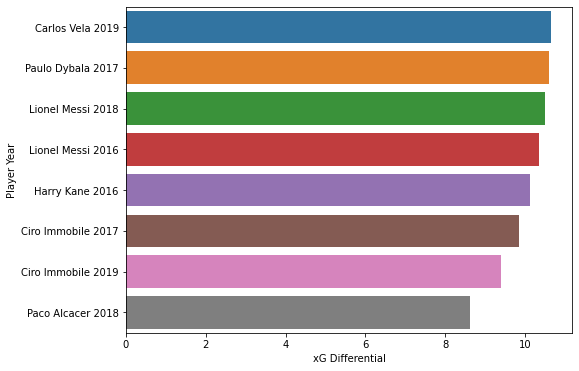

In [35]:
plt.figure(figsize = (8,6))
df_clinical = df.sort_values(by=["xG Differential"], ascending = False)
ax = sns.barplot(x = 'xG Differential', y='Player Year', data = df_clinical.head(8))
ax.set_xlabel('xG Differential')

Text(0.5, 0, 'xG Differential')

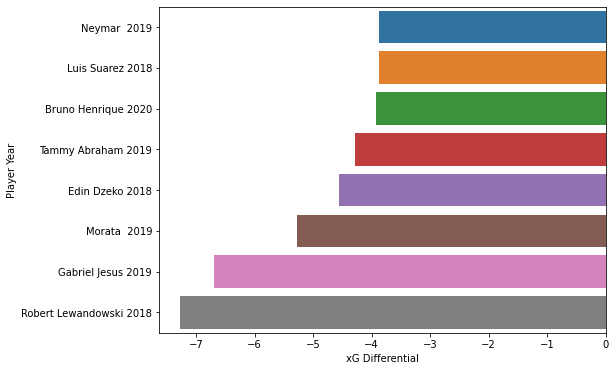

In [51]:
plt.figure(figsize = (8,6))
df_clinical = df.sort_values(by=["xG Differential"], ascending = False)
ax = sns.barplot(x = 'xG Differential', y='Player Year', data = df_clinical.tail(8))
ax.set_xlabel('xG Differential')

## The Best Goalscoring Seasons and How Clinical the Player Was

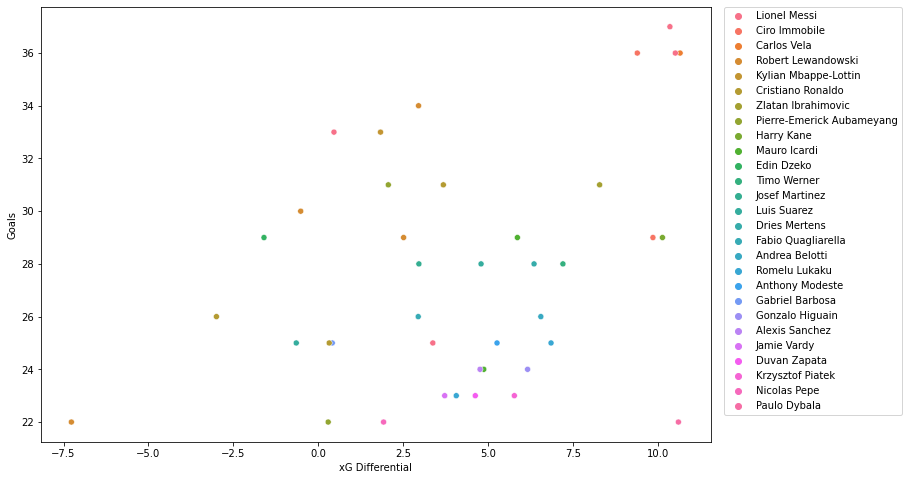

In [66]:
plt.figure(figsize=(12,8))
df_potent = df.sort_values(by=["Goals"], ascending = False)
ax = sns.scatterplot(x ='xG Differential', y='Goals', hue="Player Names", data = df_potent.head(40))
ax.set_xlabel('xG Differential')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

#### We can see that more than anything, Lionel Messi shows a remarkable ability to score goals. He generally scores far more goals than the models predict and thus proves his value as a significantly better player than the average.